# Task: Apply T-SNE on Credit Card Fraud Detection Dataset.

Info about data: it is a CSV file, contains 31 features, the last feature is used to classify the transaction whether it is a fraud or not.
#### Information about data set

The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, ... V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.

The dataset has been collected and analysed during a research collaboration of Worldline and the Machine Learning Group (http://mlg.ulb.ac.be) of ULB (Université Libre de Bruxelles) on big data mining and fraud detection.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

url = "creditcard.csv"

creditcard = pd.read_csv(url)

In [3]:
print(creditcard.head(5))

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...         V21       V22       V23       V24  \
0  0.098698  0.363787  ...   -0.018307  0.277838 -0.110474  0.066928   
1  0.085102 -0.255425  ...   -0.225775 -0.638672  0.101288 -0.339846   
2  0.247676 -1.514654  ...    0.247998  0.771679  0.909412 -0.689281   
3  0.377436 -1.387024  ...   -0.108300  0.005274 -0.190321 -1.175575   
4 -0.270533  0.817739  ...   -0.009431  0.798278 -0.137458  0.141267   

        V25       V26       V27       V28  Amount  Class  
0  0.128539 -0.189115

In [4]:
print(creditcard.shape)

(284807, 31)


In [5]:
data = creditcard.drop("Class", axis = 1)
c = creditcard["Class"]

In [6]:
print("the shape of data = ", data.shape)
print("the shape of class = ", c.shape)

the shape of data =  (284807, 30)
the shape of class =  (284807,)


In [7]:
# Data-preprocessing: Standardizing the data
from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(data)
print(standardized_data.shape)
print(type(standardized_data))
#here we have just standardized our data to col-std so that the mean = 0 and standard-deviation = 1.

(284807, 30)
<class 'numpy.ndarray'>


In [8]:
m = np.mean(standardized_data)
sd = np.std(standardized_data)
print(m)
print(sd)

-1.2108202200867089e-17
0.9999999999999997


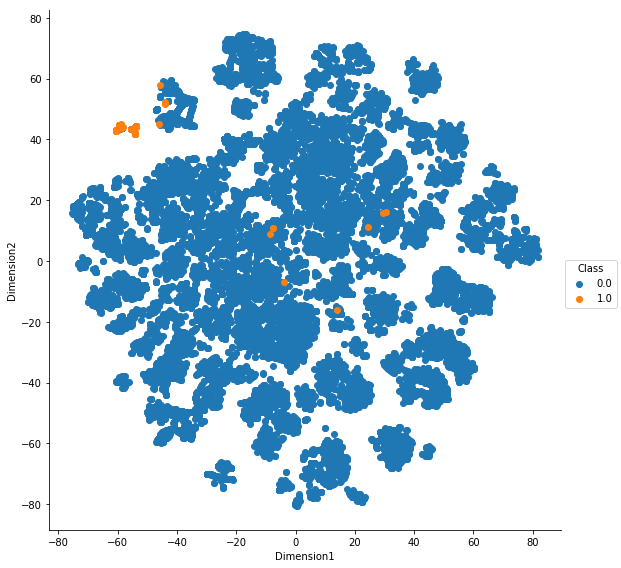

In [12]:
from sklearn.manifold import TSNE
data_25k = standardized_data[0:25000]
labels_25k = c[0:25000]

model = TSNE(n_components=2, random_state=0, perplexity=50, n_iter=1000)

tsne_data = model.fit_transform(data_25k)

# creating a new data frame which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, labels_25k)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dimension1", "Dimension2", "Class"))

# Ploting the result of tsne
sns.FacetGrid(tsne_df, hue="Class", size=8).map(plt.scatter, 'Dimension1', 'Dimension2').add_legend()
plt.show()

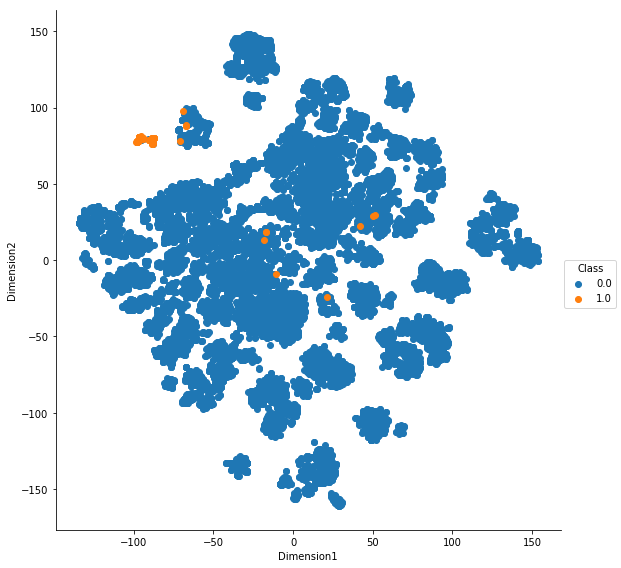

In [13]:
model = TSNE(n_components=2, random_state=0, perplexity=50, n_iter=3500)

tsne_data = model.fit_transform(data_25k)

# creating a new data frame which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, labels_25k)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dimension1", "Dimension2", "Class"))

# Ploting the result of tsne
sns.FacetGrid(tsne_df, hue="Class", size=8).map(plt.scatter, 'Dimension1', 'Dimension2').add_legend()
plt.show()

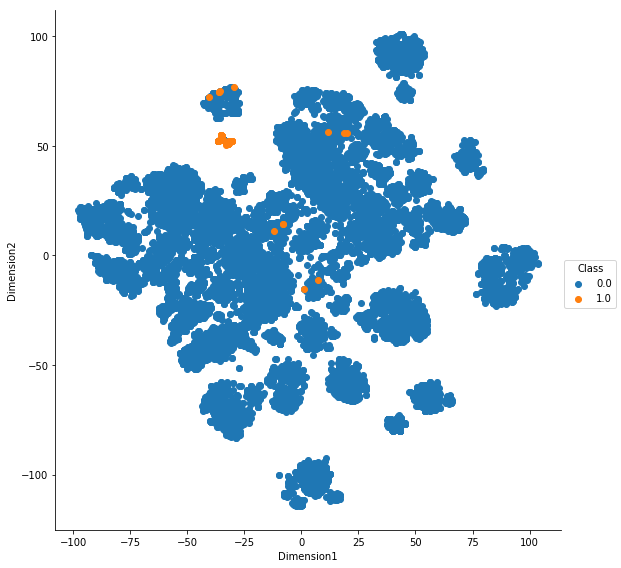

In [14]:
model = TSNE(n_components=2, random_state=0, perplexity=100, n_iter=2000)

tsne_data = model.fit_transform(data_25k)

# creating a new data frame which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, labels_25k)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dimension1", "Dimension2", "Class"))

# Ploting the result of tsne
sns.FacetGrid(tsne_df, hue="Class", size=8).map(plt.scatter, 'Dimension1', 'Dimension2').add_legend()
plt.show()

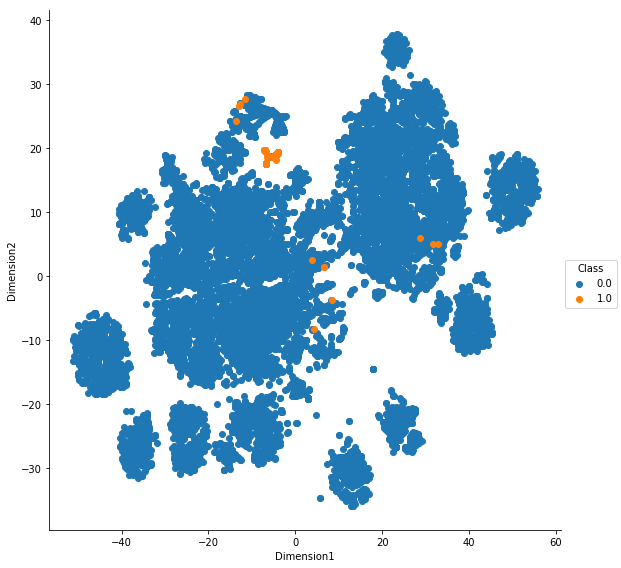

In [15]:
model = TSNE(n_components=2, random_state=0, perplexity=500, n_iter=1200)

tsne_data = model.fit_transform(data_25k)

# creating a new data frame which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, labels_25k)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dimension1", "Dimension2", "Class"))

# Ploting the result of tsne
sns.FacetGrid(tsne_df, hue="Class", size=8).map(plt.scatter, 'Dimension1', 'Dimension2').add_legend()
plt.show()

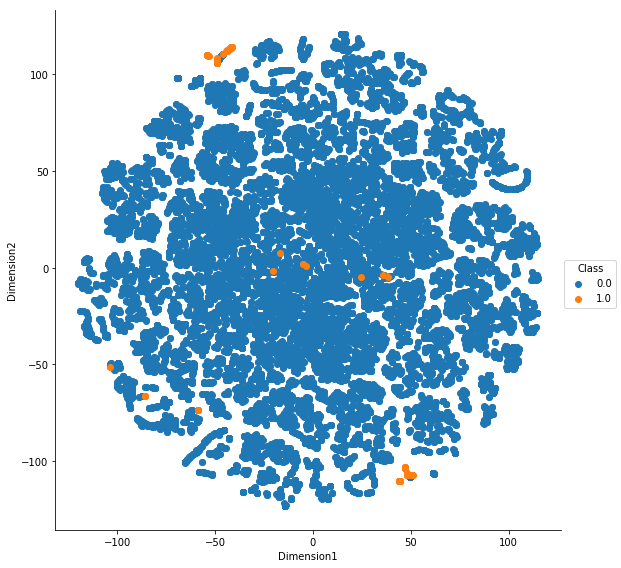

In [16]:
model = TSNE(n_components=2, random_state=0, perplexity=10, n_iter=1200)

tsne_data = model.fit_transform(data_25k)

# creating a new data frame which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, labels_25k)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dimension1", "Dimension2", "Class"))

# Ploting the result of tsne
sns.FacetGrid(tsne_df, hue="Class", size=8).map(plt.scatter, 'Dimension1', 'Dimension2').add_legend()
plt.show()